In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [228]:
data.shape

(200, 4)

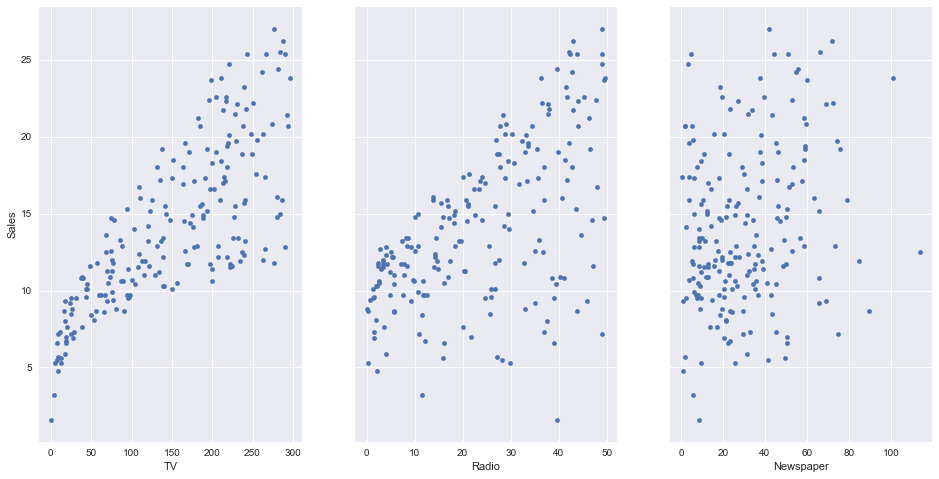

In [229]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax = axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax = axs[1], figsize=(16,8))
data.plot(kind='scatter', x='Newspaper', y='Sales', ax = axs[2], figsize=(16,8))

# Sci-kit learn 

In [230]:
from sklearn import linear_model

### TV

In [256]:
regTV = LinearRegression().fit(data[['TV']], data[['Sales']])

In [257]:
regTV.coef_

array([[ 0.04753664]])

In [255]:
regTV.intercept_

array([ 7.03259355])

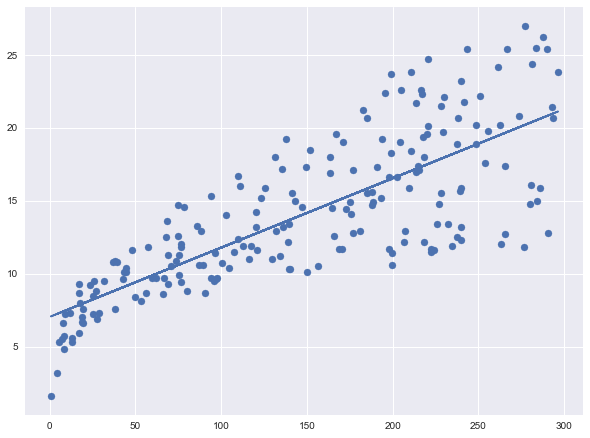

In [234]:
plt.figure(figsize=(10,7.5))
plt.scatter(data[['TV']], data[['Sales']])
plt.plot(data[['TV']], regTV.predict(data[['TV']]))

### Radio

In [235]:
regRadio = LinearRegression().fit(data[['Radio']], data[['Sales']])

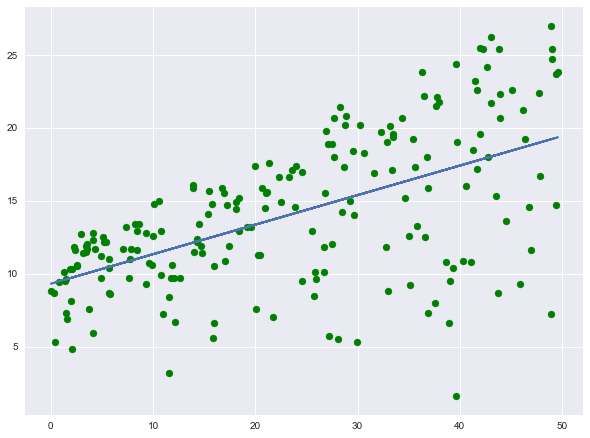

In [236]:
plt.figure(figsize=(10, 7.5))
plt.scatter(data[['Radio']], data[['Sales']], color='green')
plt.plot(data[['Radio']], regRadio.predict(data[['Radio']]))

### Newspaper

In [237]:
regNewspaper = LinearRegression().fit(data[['Newspaper']], data[['Sales']])

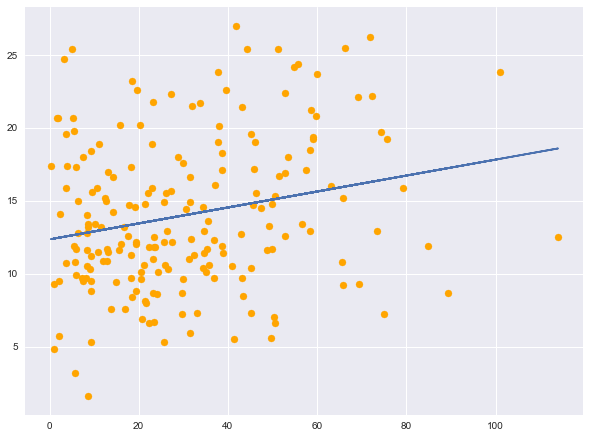

In [238]:
plt.figure(figsize=(10, 7.5))
plt.scatter(data[['Newspaper']], data[['Sales']], color='orange')
plt.plot(data[['Newspaper']], regNewspaper.predict(data[['Newspaper']]))

### Regresja wielu zmiennych

In [268]:
columns = ['TV', 'Radio', 'Newspaper']
regAll = LinearRegression().fit(data[columns], data[['Sales']])

In [269]:
regAll.intercept_

array([ 2.93888937])

In [287]:
regAll.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [289]:
regAll.predict([100, 25, 25])

/Users/Alek/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 12.20266701]])

# Statmodels

In [239]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [240]:
lm.predict(pd.DataFrame({'TV': [50]}))

array([ 9.40942557])

In [241]:
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

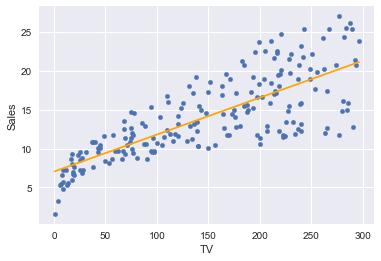

In [242]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
data.plot(kind='Scatter', x = 'TV', y='Sales')
plt.plot(X_new, preds, color = 'orange')

### Intervals - przedziały ufności

A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

In [243]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [244]:
b0 = lm.conf_int(alpha = 0.01).iloc[0][0]
b1 = lm.conf_int(alpha = 0.01).iloc[0][1]
a0 = lm.conf_int(alpha = 0.01).iloc[1][0]
a1 = lm.conf_int(alpha = 0.01).iloc[1][1]

preds0 =np.array([a0*data.TV.min()+b0,  a0*data.TV.max()+b0])
preds1 =np.array([a1*data.TV.min()+b1,  a1*data.TV.max()+b1])

In [245]:
preds0

array([  5.87017274,  17.85745877])

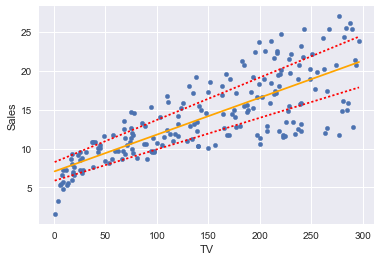

In [296]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
data.plot(kind='Scatter', x = 'TV', y='Sales')
plt.plot(X_new, preds, color = 'orange')
plt.plot(X_new, preds0, color = 'red', linestyle = ':')
plt.plot(X_new, preds1, color = 'red', linestyle = ':')


### P value - testowanie hipotezy zerowej

In [247]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 May 2017   Prob (F-statistic):           1.47e-42
Time:                        19:50:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

### R squared - dopasowanie modelu do danych

In [249]:
lm.rsquared

0.61187505085007099

### Multiple Linear Regression

In [250]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [251]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 May 2017   Prob (F-statistic):           1.58e-96
Time:                        19:50:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
lm.predict(pd.DataFrame({'TV': [50], 'Radio': [10], 'Newspaper': [1]}))

array([ 7.11138432])